## <div style="text-align: center; color: green;">Project Title: Sentiment Analysis on Amazon Product Reviews</div>

### <div style="color: gray;">Step 1: Dataset Overview-</div>
- Provide a brief overview of the Amazon product review dataset.
- Describe the columns: reviewText (textual content of the review) and Positive (binary label, 1 for positive, 0 for negative).


### <div style="color: gray;">Step 1: Solution-</div>
#### Import necessary libraries:

In [1]:
# Import the numerical algebra libs
import pandas as pd
import numpy as np
import seaborn as sns

# Import visualization libs
import matplotlib.pyplot as plt
import plotly.express as px
import string 

#Import warnings libs
import warnings
warnings.filterwarnings('ignore')

#### Load Dataset:

In [2]:
data = pd.read_csv('amazon.csv')
data.head()

,reviewText,Positive
0,This is a one of the best apps acording to a b...,1
1,This is a pretty good version of the game for ...,1
2,this is a really cool game. there are a bunch ...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1


#### Dataset Description:

##### Overview of Amazon dataset
- The Amazon product review dataset typically consists of customer reviews of products sold on Amazon. 
- It includes various fields that capture different aspects of the reviews, such as the textual content, ratings, and metadata about the products and reviewers.
- This dataset encompasses a wide range of products, from electronics to books to household items, and includes various aspects of the review process.
- I frequently used it to research and data analysis for tasks such as sentiment analysis, recommendation systems, and natural language processing.

###### Describe the columns
1. `reviewText:` This column contains the actual text of the review written by the customer. It includes their detailed feedback, opinions, and experiences regarding the product. The content can vary significantly in length and detail.

2. `Positive:` This is a binary label indicating the sentiment of the review. It is usually derived from the rating given by the customer. A value of `1` indicates that the review is positive, while a value of `0` signifies a negative review. This column is essential for sentiment analysis tasks and helps in understanding the overall sentiment distribution in the dataset.

### <div style="color: gray;">Step 2: Data Preprocessing-</div>
- Handle missing values, if any.
- Perform text preprocessing (lowercasing, removing stop words, punctuation, etc.) on the reviewText column.
- Split the dataset into training and testing sets.


### <div style="color: gray;">Step 2: Solution-</div>

#### Handle Missing Values:

In [3]:
data.columns

Index(['reviewText', 'Positive'], dtype='object')

In [4]:
data.shape

(20000, 2)

In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Positive,20000.0,0.76165,0.426085,0.0,1.0,1.0,1.0,1.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reviewText  20000 non-null  object
 1   Positive    20000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


In [7]:
data.isnull().sum()

reviewText    0
Positive      0
dtype: int64

#### Observation:

- reviewText is objective datatype and Positive is numerical datatype.
- No null/NAN data. 

#### Perform text preprocessing (lowercasing, removing stop words & punctuation)

In [8]:
#Import text preprocessing libs

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [9]:
text_column = 'reviewText'
label_column = 'Positive'
english_stopwords = set(stopwords.words('english'))
english_punctuation = string.punctuation

In [10]:
def preprocess_text(text): 
    # Remove punctuation
    remove_punc = [char for char in text if char not in english_punctuation]
    clean_text = ''.join(remove_punc) # char joining

    #Remove stopwords & Handle lowercasing
    words = word_tokenize(clean_text)
    text = ([word for word in words if word.lower() not in english_stopwords])
    return text

In [11]:
data[text_column] = data[text_column].apply(preprocess_text) 

In [12]:
data[text_column] 

0        [one, best, apps, acording, bunch, people, agr...
1        [pretty, good, version, game, free, LOTS, diff...
2        [really, cool, game, bunch, levels, find, gold...
3        [silly, game, frustrating, lots, fun, definite...
4        [terrific, game, pad, Hrs, fun, grandkids, lov...
                               ...                        
19995    [app, fricken, stupidit, froze, kindle, wont, ...
19996    [Please, add, need, neighbors, Ginger1016, tha...
19997    [love, game, awesome, wish, free, stuff, house...
19998    [love, love, love, app, side, fashion, story, ...
19999    [game, rip, list, things, MAKE, BETTERbull, Fi...
Name: reviewText, Length: 20000, dtype: object

In [13]:
data[text_column][0]

['one',
 'best',
 'apps',
 'acording',
 'bunch',
 'people',
 'agree',
 'bombs',
 'eggs',
 'pigs',
 'TNT',
 'king',
 'pigs',
 'realustic',
 'stuff']

#### Lemmatization:

- Lemmatization is a natural language processing (NLP) technique that involves reducing words to their base or dictionary form, known as the lemma. 
- This process helps standardize words with different inflections or forms to their common root, making text analysis more effective

In [14]:
#Use word net lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    lemmatized_text = ' '.join([lemmatizer.lemmatize(word) for word in text])
    return lemmatized_text

data[text_column] = data[text_column].apply(lemmatize_text)

In [15]:
data[text_column] 

0        one best apps acording bunch people agree bomb...
1        pretty good version game free LOTS different l...
2        really cool game bunch level find golden egg s...
3        silly game frustrating lot fun definitely reco...
4        terrific game pad Hrs fun grandkids love Great...
                               ...                        
19995    app fricken stupidit froze kindle wont allow p...
19996    Please add need neighbor Ginger1016 thanks bun...
19997    love game awesome wish free stuff house didnt ...
19998    love love love app side fashion story fight wo...
19999    game rip list thing MAKE BETTERbull First NEED...
Name: reviewText, Length: 20000, dtype: object

In [16]:
data[text_column][0]

'one best apps acording bunch people agree bomb egg pig TNT king pig realustic stuff'

#### Create word clouds

In [17]:
#Import wordcloud libs
from wordcloud import WordCloud 

In [18]:
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)

negative_review = ' '.join(data[data['Positive'] == 1]['reviewText']) #negative
positive_review = ' '.join(data[data['Positive'] == 0]['reviewText']) #positive

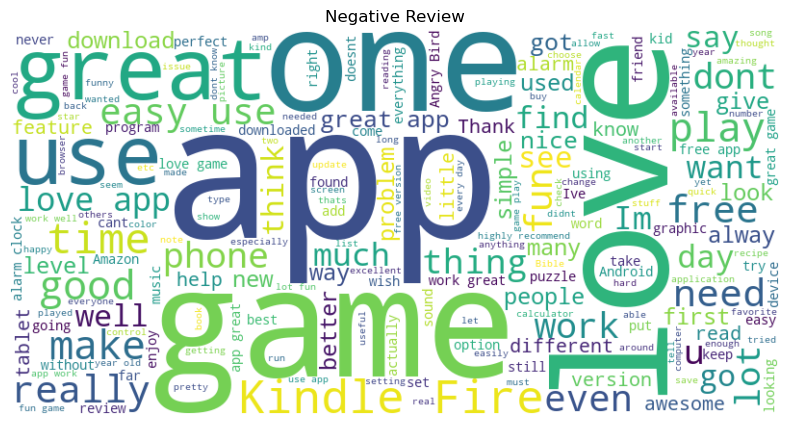

In [19]:
#for negative review
plot_wordcloud(negative_review, 'Negative Review')
plt.show()

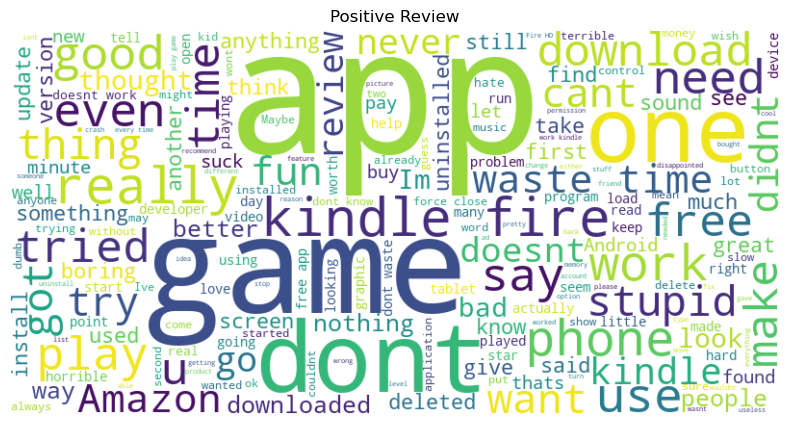

In [20]:
#for positive review
plot_wordcloud(positive_review, 'Positive Review')
plt.show()

#### Convert the text data into a numerical format:

Here our text_column have text type data. so, first we need to convert this text data into numeric format before applying any machine learning model. 

- To convert text data into a numerical format, I use the Term Frequency-Inverse Document Frequency (TF-IDF) method. 
- TF-IDF is a statistical measure used to evaluate the importance of a word in a document relative to a collection of documents (or corpus). 
- It is commonly used in text mining and information retrieval to convert textual data into numerical features that can be used by machine learning algorithms.

In [21]:
#Import vectorization libs
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
#I use TF-IDF
vectorizer = TfidfVectorizer()

x = vectorizer.fit_transform(data[text_column])
y = data[label_column]

In [23]:
np.array(x)

array(<20000x22614 sparse matrix of type '<class 'numpy.float64'>'
	with 310839 stored elements in Compressed Sparse Row format>,
      dtype=object)

In [24]:
cv_df = pd.DataFrame(x.toarray(), index=data[text_column], columns=vectorizer.get_feature_names_out())

In [25]:
cv_df

,00,000,000000,007,01302013,02,025cent,04042011,05,051414,...,zoology,zoom,zoomed,zooming,zpg,zumocast,zz,zzz,zzzz,zzzzz
reviewText,,,,,,,,,,,,,,,,,,,,,
one best apps acording bunch people agree bomb egg pig TNT king pig realustic stuff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pretty good version game free LOTS different level play kid enjoy lot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
really cool game bunch level find golden egg super fun,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
silly game frustrating lot fun definitely recommend fun time,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
terrific game pad Hrs fun grandkids love Great entertainment waiting long line,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
app fricken stupidit froze kindle wont allow place iteams ignore 5 people wrong many level people made game excidently press wrong button money jer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Please add need neighbor Ginger1016 thanks bunch awesome game much fun lot like farmville FB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
love game awesome wish free stuff house didnt cost much fun fun,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Split the dataset into training and testing sets:

In [26]:
#Import data splitting libs
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

In [28]:
x_train.shape, y_train.shape

((16000, 22614), (16000,))

In [29]:
x_test.shape, y_test.shape

((4000, 22614), (4000,))

### <div style="color: gray;">Step 3: Model Selection-</div>

Choose at least three different machine learning models for sentiment classification. Suggested models include:

- Logistic Regression
- Random Forest
- Support Vector Machine (SVM)
- Naïve Bayes
- Gradient Boosting (e.g., XGBoost, AdaBoost, CastBoost)
- LSTM
- Gated Recurrent Units (GRUs)



### <div style="color: gray;">Step 3: Solution-</div>

#### 1. Apply Logistic Regression Model-

In [30]:
#from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LogisticRegression

In [31]:
L_reg = LogisticRegression().fit(x_train,y_train)
L_reg

LogisticRegression()

In [32]:
L_reg.predict(x_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [33]:
np.array(y_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

#### Evaluate Logistic Regression Model-

In [34]:
from sklearn.metrics import classification_report, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, confusion_matrix,RocCurveDisplay
from termcolor import colored

In [35]:
y_pred = L_reg.predict(x_test)

train_accuracy_LR = L_reg.score(x_train,y_train)
test_accuracy_LR = L_reg.score(x_test, y_test)
accuracy_score_LR = accuracy_score(y_test, y_pred)
precision_score_LR = precision_score(y_test, y_pred)
recall_score_LR = recall_score(y_test, y_pred)
f1_score_LR = f1_score(y_test, y_pred)
cm_LR = confusion_matrix(y_test, y_pred)

print(colored('Logistic Regression Model Evaluation:\n',color = 'blue', attrs = ['bold','dark']))
print(colored(f'train_accuracy : {round(train_accuracy_LR,2)}',color='light_magenta'))
print(colored(f'test_accuracy : {round(test_accuracy_LR,2)}',color='light_magenta'))
print(colored(f'accuracy_score : {round(accuracy_score_LR,2)}',color='light_magenta'))
print(colored(f'precision_score : {round(precision_score_LR,2)}',color='light_magenta'))
print(colored(f'recall_score : {round(recall_score_LR,2)}',color='light_magenta'))
print(colored(f'f1_score : {round(f1_score_LR,2)}',color='light_magenta'))
print(colored(f'\nconfusion_matrix :\n {cm_LR}',color='light_yellow'))

Logistic Regression Model Evaluation:

train_accuracy : 0.92
test_accuracy : 0.89
accuracy_score : 0.89
precision_score : 0.9
recall_score : 0.97
f1_score : 0.93

confusion_matrix :
 [[ 607  325]
 [ 107 2961]]


#### RocCurve visualization for Logistic Regression Model-

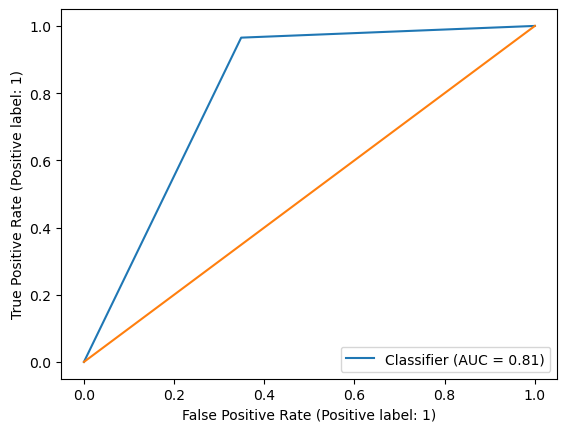

In [36]:
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.plot([0,1],[0,1])
plt.show()

#### 2. Apply Multinomial Naive Bayes Model-

In [37]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

In [38]:
#Here, I apply Multinomial Naive Bayes Model for prediction.

MNB_model = MultinomialNB()
MNB_model.fit(x_train, y_train)

MultinomialNB()

In [39]:
MNB_model.predict(x_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [40]:
np.array(y_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

#### Evaluate Multinomial Naive Bayes Model-

In [41]:
y_pred= MNB_model.predict(x_test)

train_accuracy_MNB = MNB_model.score(x_train,y_train)
test_accuracy_MNB = MNB_model.score(x_test, y_test)
accuracy_score_MNB = accuracy_score(y_test, y_pred)
precision_score_MNB = precision_score(y_test, y_pred)
recall_score_MNB = recall_score(y_test, y_pred)
f1_score_MNB = f1_score(y_test, y_pred)
cm_MNB = confusion_matrix(y_test, y_pred)

print(colored('Multinomial Naive Bayes Model Evaluation:\n',color = 'blue', attrs = ['bold','dark']))
print(colored(f'train_accuracy : {round(train_accuracy_MNB,2)}',color='light_magenta'))
print(colored(f'test_accuracy : {round(test_accuracy_MNB,2)}',color='light_magenta'))
print(colored(f'accuracy_score : {round(accuracy_score_MNB,2)}',color='light_magenta'))
print(colored(f'precision_score : {round(precision_score_MNB,2)}',color='light_magenta'))
print(colored(f'recall_score : {round(recall_score_MNB,2)}',color='light_magenta'))
print(colored(f'f1_score : {round(f1_score_MNB,2)}',color='light_magenta'))
print(colored(f'\nconfusion_matrix :\n {cm_MNB}',color='light_yellow'))

Multinomial Naive Bayes Model Evaluation:

train_accuracy : 0.81
test_accuracy : 0.8
accuracy_score : 0.8
precision_score : 0.79
recall_score : 1.0
f1_score : 0.88

confusion_matrix :
 [[ 137  795]
 [   7 3061]]


#### RocCurve visualization for Multinomial Naive Bayes Model:

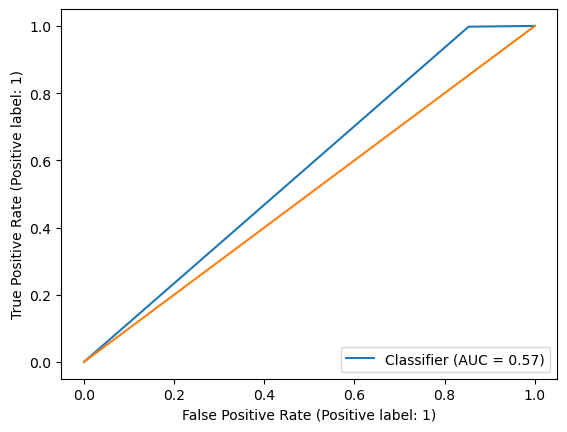

In [42]:
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.plot([0,1],[0,1])
plt.show()

#### 3. Apply Random Forest Classifier Model-

In [43]:
#import random forest classifier

from sklearn.ensemble import RandomForestClassifier

In [44]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [45]:
rf_clf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [46]:
rf_clf.predict(x_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [47]:
np.array(y_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

#### Evaluate Random Forest Classifier Model-

In [48]:
y_pred= rf_clf.predict(x_test)

train_accuracy_rf_clf = rf_clf.score(x_train,y_train)
test_accuracy_rf_clf= rf_clf.score(x_test, y_test)
accuracy_score_rf_clf = accuracy_score(y_test, y_pred)
precision_score_rf_clf = precision_score(y_test, y_pred)
recall_score_rf_clf = recall_score(y_test, y_pred)
f1_score_rf_clf= f1_score(y_test, y_pred)
cm_rf_clf = confusion_matrix(y_test, y_pred)

print(colored('Random Forest Classifier Model Evaluation:\n',color = 'blue', attrs = ['bold','dark']))
print(colored(f'train_accuracy : {round(train_accuracy_rf_clf,2)}',color='light_magenta'))
print(colored(f'test_accuracy : {round(test_accuracy_rf_clf,2)}',color='light_magenta'))
print(colored(f'accuracy_score : {round(accuracy_score_rf_clf,2)}',color='light_magenta'))
print(colored(f'precision_score : {round(precision_score_rf_clf,2)}',color='light_magenta'))
print(colored(f'recall_score : {round(recall_score_rf_clf,2)}',color='light_magenta'))
print(colored(f'f1_score : {round(f1_score_rf_clf,2)}',color='light_magenta'))
print(colored(f'\nconfusion_matrix :\n {cm_rf_clf}',color='light_yellow'))

Random Forest Classifier Model Evaluation:

train_accuracy : 1.0
test_accuracy : 0.88
accuracy_score : 0.88
precision_score : 0.88
recall_score : 0.98
f1_score : 0.92

confusion_matrix :
 [[ 507  425]
 [  68 3000]]


#### RocCurve visualization  for Random Forest Classifier Model:

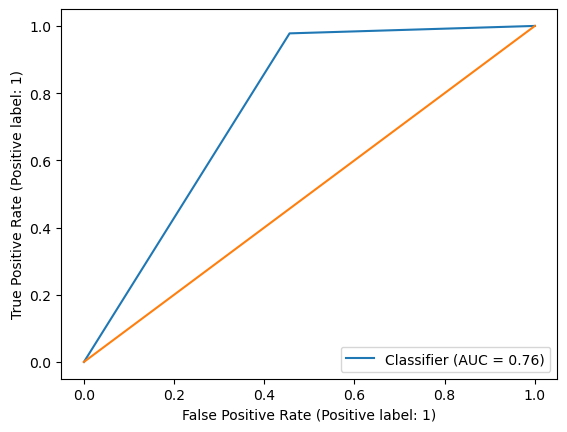

In [49]:
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.plot([0,1],[0,1])
plt.show()

#### 4. Apply Support Vector Machine (SVM) Model-

In [50]:
#import SVR classifier

from sklearn.svm import SVC

In [51]:
SVC= SVC().fit(x_train, y_train)

In [52]:
SVC.predict(x_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [53]:
np.array(y_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

#### Evaluate Support Vector Machine (SVM) Model-

In [54]:
y_pred= SVC.predict(x_test)

train_accuracy_SVC = SVC.score(x_train,y_train)
test_accuracy_SVC = SVC.score(x_test, y_test)
accuracy_score_SVC = accuracy_score(y_test, y_pred)
precision_score_SVC = precision_score(y_test, y_pred)
recall_score_SVC = recall_score(y_test, y_pred)
f1_score_SVC = f1_score(y_test, y_pred)
cm_SVC = confusion_matrix(y_test, y_pred)

print(colored('Support Vector Machine (SVM) Model Evaluation:\n',color = 'blue', attrs = ['bold','dark']))
print(colored(f'train_accuracy : {round(train_accuracy_SVC,2)}',color='light_magenta'))
print(colored(f'test_accuracy : {round(test_accuracy_SVC,2)}',color='light_magenta'))
print(colored(f'accuracy_score : {round(accuracy_score_SVC,2)}',color='light_magenta'))
print(colored(f'precision_score : {round(precision_score_SVC,2)}',color='light_magenta'))
print(colored(f'recall_score : {round(recall_score_SVC,2)}',color='light_magenta'))
print(colored(f'f1_score : {round(f1_score_SVC,2)}',color='light_magenta'))
print(colored(f'\nconfusion_matrix :\n {cm_SVC}',color='light_yellow'))

Support Vector Machine (SVM) Model Evaluation:

train_accuracy : 0.99
test_accuracy : 0.89
accuracy_score : 0.89
precision_score : 0.91
recall_score : 0.96
f1_score : 0.93

confusion_matrix :
 [[ 622  310]
 [ 112 2956]]


#### RocCurve visualization for Support Vector Machine (SVM) Model:

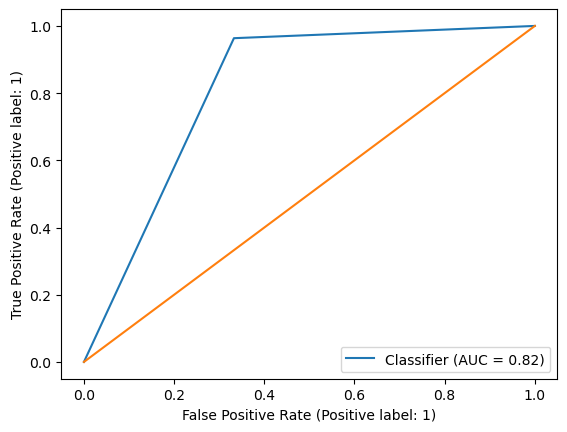

In [55]:
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.plot([0,1],[0,1])
plt.show()

#### 5. Apply XGBoost Classifier Model-

In [56]:
#Import XGBoost libs

import xgboost 
from xgboost import XGBClassifier

In [57]:
XGB = XGBClassifier().fit(x_train, y_train)

In [58]:
XGB.predict(x_test)

array([1, 1, 1, ..., 1, 1, 1])

In [59]:
np.array(y_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

#### Evaluate XGBoost Classifier Model-

In [60]:
y_pred= XGB.predict(x_test)

train_accuracy_XGB = XGB.score(x_train,y_train)
test_accuracy_XGB = XGB.score(x_test, y_test)
accuracy_score_XGB = accuracy_score(y_test, y_pred)
precision_score_XGB = precision_score(y_test, y_pred)
recall_score_XGB = recall_score(y_test, y_pred)
f1_score_XGB = f1_score(y_test, y_pred)
cm_XGB = confusion_matrix(y_test, y_pred)

print(colored('XGBoost Classifier Model Evaluation:\n',color = 'blue', attrs = ['bold','dark']))
print(colored(f'train_accuracy : {round(train_accuracy_XGB,2)}',color='light_magenta'))
print(colored(f'test_accuracy : {round(test_accuracy_XGB,2)}',color='light_magenta'))
print(colored(f'accuracy_score : {round(accuracy_score_XGB,2)}',color='light_magenta'))
print(colored(f'precision_score : {round(precision_score_XGB,2)}',color='light_magenta'))
print(colored(f'recall_score : {round(recall_score_XGB,2)}',color='light_magenta'))
print(colored(f'f1_score : {round(f1_score_XGB,2)}',color='light_magenta'))
print(colored(f'\nconfusion_matrix :\n {cm_XGB}',color='light_yellow'))

XGBoost Classifier Model Evaluation:

train_accuracy : 0.93
test_accuracy : 0.88
accuracy_score : 0.88
precision_score : 0.9
recall_score : 0.96
f1_score : 0.93

confusion_matrix :
 [[ 588  344]
 [ 121 2947]]


#### RocCurve visualization for XGBoost Classifier Model:

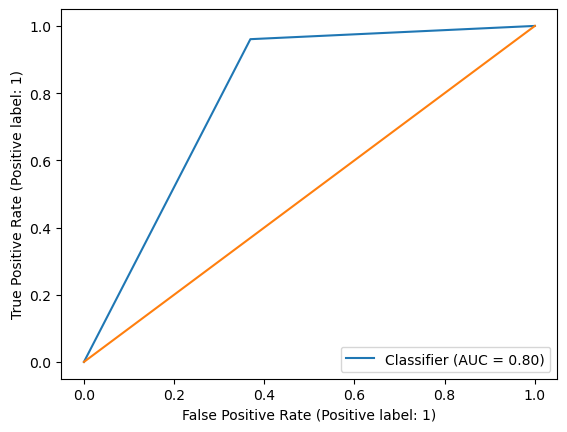

In [61]:
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.plot([0,1],[0,1])
plt.show()

### <div style="color: gray;">Step 4: Model Training-</div>

   - Train each selected model on the training dataset.
   - Utilize appropriate vectorization techniques (e.g., TF-IDF, word embeddings) for the text data.


In [1]:
#I already done this part in Step 3 and 2.

### <div style="color: gray;">Step 5: Formal Evaluation-</div>

Evaluate the performance of each model on the testing set using the following metrics:
- Accuracy
- Precision
- Recall
- F1 Score
- Confusion Matrix

In [63]:
#I already done this part in Step 3.

### <div style="color: gray;">Step 6: Hyperparameter Tuning-</div>

- Conduct hyperparameter tuning for one or more selected models using techniques like Grid Search or Random Search.
- Explain the chosen hyperparameters and the reasoning behind them.



### <div style="color: gray;">Step 6: Solution-</div>

- I use RandomizedSearchCV for hyperparameter optimization. It basically works with various parameters internally and finds out the best parameters.
- I apply Hyperparameter tuning technique in our Logistic Regression, Random Forest Classifier, Support Vector Machine (SVM) &  XGBoost Classifier Model because these four model gives present higher accuracy.

#### Initialized Hyperparameters

In [64]:
#I use RandomizedSearchCV for hyperparameter optimization

from scipy.stats import randint, uniform, loguniform
#Define hyperparameters for Logistic Regression
lr_params = {
    'C': loguniform(1e-3, 1e3),
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 150, 200, 250, 300, 350, 400, 500],
    'l1_ratio': uniform(0, 1)
}

#Define hyperparameters for Random Forest
rf_params = {
    'n_estimators': np.arange(10, 200, 10),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': np.arange(5, 50, 5),
    'min_samples_split': np.arange(2, 10, 2),
    'min_samples_leaf': np.arange(1, 10, 2),
    'bootstrap': [True, False]
}

#Define hyperparameters for Support Vector Machine (SVM)
svm_params = {
    'C': uniform(loc=0.1, scale=10),         
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  
    'degree': np.arange(2, 5),               
    'gamma': ['scale', 'auto', uniform(loc=0.01, scale=0.1)], 
    'coef0': uniform(0, 10),        
    'class_weight': [None, 'balanced']      
}

#Define hyperparameters for  XGBoost Classifier
xgb_params = {
    'n_estimators': randint(50, 1000),                 
    'max_depth': randint(3, 10),                     
    'learning_rate': uniform(0.01, 0.3),             
    'subsample': uniform(0.6, 0.4),                  
    'colsample_bytree': uniform(0.6, 0.4),            
    'gamma': uniform(0, 0.5),                         
    'min_child_weight': randint(1, 10),               
    'reg_alpha': uniform(0, 1),                      
    'reg_lambda': uniform(0, 1),                   
    'scale_pos_weight': uniform(1, 3)               
}

#### Logistic Regression Model for DRandomizedSearchCV Hyperparameter

In [65]:
#import hyperparameter
from sklearn.model_selection import RandomizedSearchCV

In [66]:
log_reg = LogisticRegression(max_iter=1000)

lr_random_search = RandomizedSearchCV(
    log_reg, param_distributions=lr_params, n_iter=50, cv=5, verbose=2, random_state=42, n_jobs=-1
)

In [67]:
lr_random_search.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002099D2E7510>,
                                        'l1_ratio': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002099A19BA90>,
                                        'max_iter': [100, 150, 200, 250, 300,
                                                     350, 400, 500],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, verbose=2)

In [68]:
lr_random_search.best_params_

{'C': 4.418441521199722,
 'l1_ratio': 0.17052412368729153,
 'max_iter': 400,
 'penalty': 'l2',
 'solver': 'sag'}

#### Evalution Logistic Regression Model for DRandomizedSearchCV Hyperparameter

In [69]:
y_pred = lr_random_search.predict(x_test)

train_accuracy_LR_RSH = lr_random_search.score(x_train,y_train)
test_accuracy_LR_RSH = lr_random_search.score(x_test, y_test)
accuracy_score_LR_RSH = accuracy_score(y_test, y_pred)
precision_score_LR_RSH = precision_score(y_test, y_pred)
recall_score_LR_RSH = recall_score(y_test, y_pred)
f1_score_LR_RSH = f1_score(y_test, y_pred)
cm_LR_RSH = confusion_matrix(y_test, y_pred)

print(colored('Logistic Regression Model with DRandomizedSearchCV Hyperparameter Evaluation:\n',color = 'blue', attrs = ['bold','dark']))
print(colored(f'train_accuracy : {round(train_accuracy_LR_RSH,2)}',color='light_magenta'))
print(colored(f'test_accuracy : {round(test_accuracy_LR_RSH,2)}',color='light_magenta'))
print(colored(f'accuracy_score : {round(accuracy_score_LR_RSH,2)}',color='light_magenta'))
print(colored(f'precision_score : {round(precision_score_LR_RSH,2)}',color='light_magenta'))
print(colored(f'recall_score : {round(recall_score_LR_RSH,2)}',color='light_magenta'))
print(colored(f'f1_score : {round(f1_score_LR_RSH,2)}',color='light_magenta'))
print(colored(f'\nconfusion_matrix :\n {cm_LR_RSH}',color='light_yellow'))

Logistic Regression Model with DRandomizedSearchCV Hyperparameter Evaluation:

train_accuracy : 0.96
test_accuracy : 0.9
accuracy_score : 0.9
precision_score : 0.92
recall_score : 0.95
f1_score : 0.94

confusion_matrix :
 [[ 670  262]
 [ 141 2927]]


#### RocCurve visualization for Logistic Regression Model with DRandomizedSearchCV Hyperparameter:

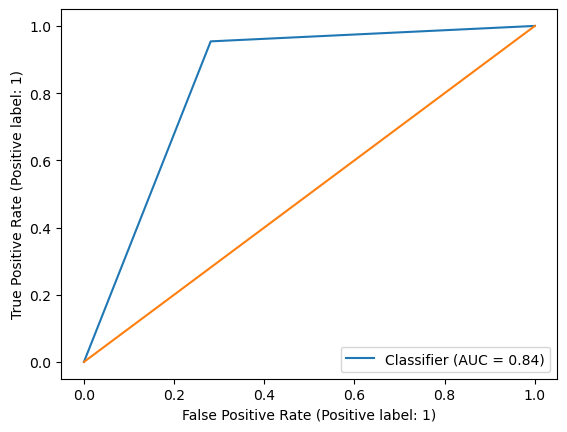

In [70]:
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.plot([0,1],[0,1])
plt.show()

#### Random Forest Classifier Model for DRandomizedSearchCV Hyperparameter:

In [71]:
rf = RandomForestClassifier()

rf_random_search = RandomizedSearchCV(
    rf, param_distributions=rf_params, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1
)

In [72]:
rf_random_search.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([1, 3, 5, 7, 9]),
                                        'min_samples_split': array([2, 4, 6, 8]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
                   random_state=42, verbose=2)

In [73]:
rf_random_search.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 45,
 'bootstrap': False}

#### Evaluate Random Forest Classifier Model for DRandomizedSearchCV Hyperparameter:

In [74]:
y_pred= rf_random_search.predict(x_test)

train_accuracy_rf_RSH = rf_random_search.score(x_train,y_train)
test_accuracy_rf_RSH= rf_random_search.score(x_test, y_test)
accuracy_score_rf_RSH = accuracy_score(y_test, y_pred)
precision_score_rf_RSH = precision_score(y_test, y_pred)
recall_score_rf_RSH = recall_score(y_test, y_pred)
f1_score_rf_RSH= f1_score(y_test, y_pred)
cm_rf_RSH = confusion_matrix(y_test, y_pred)

print(colored('Random Forest Classifier with DRandomizedSearchCV Hyperparameter Model Evaluation:\n',color = 'blue', attrs = ['bold','dark']))
print(colored(f'train_accuracy : {round(train_accuracy_rf_RSH,2)}',color='light_magenta'))
print(colored(f'test_accuracy : {round(test_accuracy_rf_RSH,2)}',color='light_magenta'))
print(colored(f'accuracy_score : {round(accuracy_score_rf_RSH,2)}',color='light_magenta'))
print(colored(f'precision_score : {round(precision_score_rf_RSH,2)}',color='light_magenta'))
print(colored(f'recall_score : {round(recall_score_rf_RSH,2)}',color='light_magenta'))
print(colored(f'f1_score : {round(f1_score_rf_RSH,2)}',color='light_magenta'))
print(colored(f'\nconfusion_matrix :\n {cm_rf_RSH}',color='light_yellow'))

Random Forest Classifier with DRandomizedSearchCV Hyperparameter Model Evaluation:

train_accuracy : 0.88
test_accuracy : 0.82
accuracy_score : 0.82
precision_score : 0.81
recall_score : 1.0
f1_score : 0.89

confusion_matrix :
 [[ 207  725]
 [  10 3058]]


#### RocCurve visualization for Random Forest Classifier Model with DRandomizedSearchCV Hyperparameter:

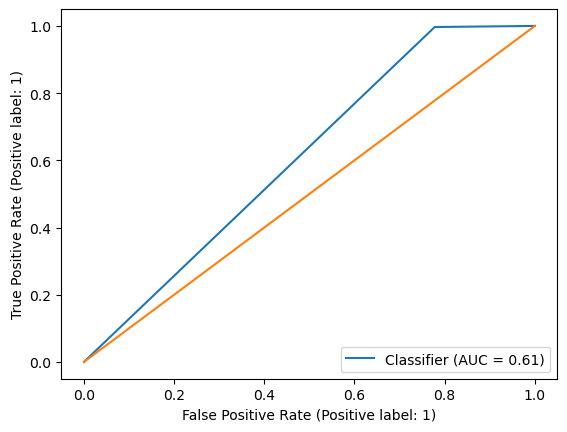

In [75]:
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.plot([0,1],[0,1])
plt.show()

#### Support Vector Machine (SVM) classifier Model for DRandomizedSearchCV Hyperparameter:

In [76]:
from sklearn.svm import SVC
svc = SVC()

svm_random_search = RandomizedSearchCV(
    svc, param_distributions=svm_params, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1
)

In [77]:
svm_random_search.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002099D31E090>,
                                        'class_weight': [None, 'balanced'],
                                        'coef0': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002099D336C50>,
                                        'degree': array([2, 3, 4]),
                                        'gamma': ['scale', 'auto',
                                                  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002099D336410>],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   random_state=42, verbose=2)

In [78]:
svm_random_search.best_params_

{'C': 1.006064345328208,
 'class_weight': 'balanced',
 'coef0': 1.9967378215835974,
 'degree': 4,
 'gamma': 'scale',
 'kernel': 'rbf'}

#### Evaluate Support Vector Machine (SVM) Classifier Model for DRandomizedSearchCV Hyperparameter:

In [79]:
y_pred= svm_random_search.predict(x_test)

train_accuracy_SVC_RSH = svm_random_search.score(x_train,y_train)
test_accuracy_SVC_RSH = svm_random_search.score(x_test, y_test)
accuracy_score_SVC_RSH = accuracy_score(y_test, y_pred)
precision_score_SVC_RSH = precision_score(y_test, y_pred)
recall_score_SVC_RSH = recall_score(y_test, y_pred)
f1_score_SVC_RSH = f1_score(y_test, y_pred)
cm_SVC_RSH = confusion_matrix(y_test, y_pred)

print(colored('Support Vector Machine (SVM) with DRandomizedSearchCV Hyperparameter Model Evaluation:\n',color = 'blue', attrs = ['bold','dark']))
print(colored(f'train_accuracy : {round(train_accuracy_SVC_RSH,2)}',color='light_magenta'))
print(colored(f'test_accuracy : {round(test_accuracy_SVC_RSH,2)}',color='light_magenta'))
print(colored(f'accuracy_score : {round(accuracy_score_SVC_RSH,2)}',color='light_magenta'))
print(colored(f'precision_score : {round(precision_score_SVC_RSH,2)}',color='light_magenta'))
print(colored(f'recall_score : {round(recall_score_SVC_RSH,2)}',color='light_magenta'))
print(colored(f'f1_score : {round(f1_score_SVC_RSH,2)}',color='light_magenta'))
print(colored(f'\nconfusion_matrix :\n {cm_SVC_RSH}',color='light_yellow'))

Support Vector Machine (SVM) with DRandomizedSearchCV Hyperparameter Model Evaluation:

train_accuracy : 0.99
test_accuracy : 0.9
accuracy_score : 0.9
precision_score : 0.94
recall_score : 0.93
f1_score : 0.93

confusion_matrix :
 [[ 734  198]
 [ 207 2861]]


#### RocCurve visualization for Support Vector Machine (SVM) Classifier Model with DRandomizedSearchCV Hyperparameter:

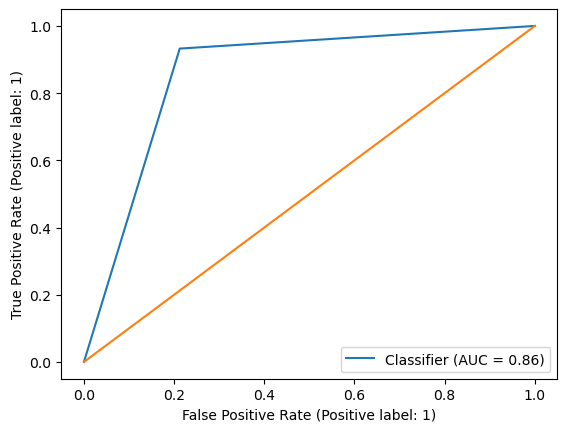

In [80]:
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.plot([0,1],[0,1])
plt.show()

#### XGBoost classifier Model for DRandomizedSearchCV Hyperparameter:

In [81]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

xgb_random_search = RandomizedSearchCV(
    xgb, param_distributions=xgb_params, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1
)

In [82]:
xgb_random_search.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='mlogloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learnin...
                                        'reg_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002099D325F10>,
                                        'reg_lambda': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002099D326410>,
                                        'scale_pos_weight': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002099D326A90>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002099D324550>},
                   random_state=42, verbose=2)

In [83]:
xgb_random_search.best_params_

{'colsample_bytree': 0.8194861236829635,
 'gamma': 0.2672117518662615,
 'learning_rate': 0.11679744528159583,
 'max_depth': 8,
 'min_child_weight': 2,
 'n_estimators': 994,
 'reg_alpha': 0.5034172708548569,
 'reg_lambda': 0.6903948286293653,
 'scale_pos_weight': 1.1179364195232968,
 'subsample': 0.919764159563617}

#### Evaluate XGBoost classifier Model for DRandomizedSearchCV Hyperparameter:

In [84]:
y_pred= xgb_random_search.predict(x_test)

train_accuracy_XGB_RSH = xgb_random_search.score(x_train,y_train)
test_accuracy_XGB_RSH = xgb_random_search.score(x_test, y_test)
accuracy_score_XGB_RSH = accuracy_score(y_test, y_pred)
precision_score_XGB_RSH = precision_score(y_test, y_pred)
recall_score_XGB_RSH = recall_score(y_test, y_pred)
f1_score_XGB_RSH = f1_score(y_test, y_pred)
cm_XGB_RSH = confusion_matrix(y_test, y_pred)

print(colored('XGBoost Classifier for DRandomizedSearchCV Hyperparameter Model Evaluation:\n',color = 'blue', attrs = ['bold','dark']))
print(colored(f'train_accuracy : {round(train_accuracy_XGB_RSH,2)}',color='light_magenta'))
print(colored(f'test_accuracy : {round(test_accuracy_XGB_RSH,2)}',color='light_magenta'))
print(colored(f'accuracy_score : {round(accuracy_score_XGB_RSH,2)}',color='light_magenta'))
print(colored(f'precision_score : {round(precision_score_XGB_RSH,2)}',color='light_magenta'))
print(colored(f'recall_score : {round(recall_score_XGB_RSH,2)}',color='light_magenta'))
print(colored(f'f1_score : {round(f1_score_XGB_RSH,2)}',color='light_magenta'))
print(colored(f'\nconfusion_matrix :\n {cm_XGB_RSH}',color='light_yellow'))

XGBoost Classifier for DRandomizedSearchCV Hyperparameter Model Evaluation:

train_accuracy : 0.98
test_accuracy : 0.89
accuracy_score : 0.89
precision_score : 0.91
recall_score : 0.95
f1_score : 0.93

confusion_matrix :
 [[ 660  272]
 [ 158 2910]]


#### RocCurve visualization for XGBoost Classifier Model with DRandomizedSearchCV Hyperparameter:

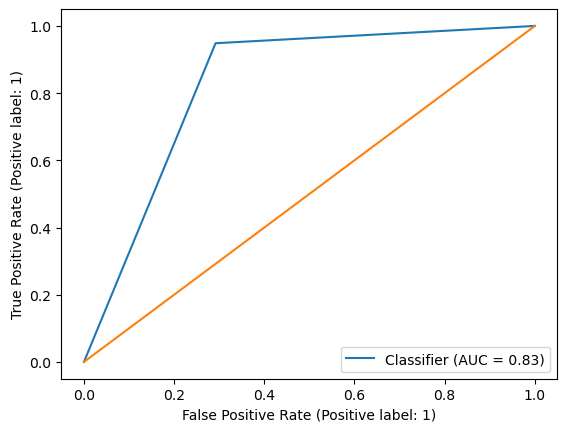

In [85]:
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.plot([0,1],[0,1])
plt.show()

#### Observations

- Perform DRandomizedSearchCV Hyperparameter, I see that it gives better accuracy in  Logistic Regression, Support Vector Machine (SVM) and XGBoost Classifier Model. 

#### Explain the chosen hyperparameters

Here, I use Random Search for Hyperparameter Tuning.
  
  
##### Random Search:
Random Search randomly samples the hyperparameter space. Instead of trying all combinations, it tries a fixed number of random combinations.

- Advantages:
  
  1. Efficiency: Random Search can be more efficient than Grid Search. It can cover a larger area of the hyperparameter space with fewer evaluations, especially when some hyperparameters do not significantly impact performance.
  
  2. Flexibility: It allows for more flexibility in the number of parameter combinations tested. You can control the computational cost by setting the number of iterations.
  
  3. Potential to Find Better Solutions: It has the potential to find better hyperparameter combinations, as it is not restricted to a fixed grid and can explore more diverse configurations.
  
  4. Empirical Evidence: Research has shown that Random Search can be as effective, if not more, than Grid Search for many practical problems, particularly when only a few hyperparameters significantly impact performance.

### <div style="color: gray;">Step 7: Comparative Analysis-</div>

   - Compare the performance of different models based on the evaluation metrics.
   - Identify the strengths and weaknesses of each model.



### <div style="color: gray;">Step 7: Solution-</div>

#### Compare the performance of different models

In [86]:
d = {
    'model' : ['Logistic Regression','Multinomial Naive Bayes', 'Random Forest Classifier', 
               'Support Vector Machine (SVM)','XGBoost Classifier',
               'Logistic Regression with Random Search Hyperparameter',
               'Random Forest Classifier with Random Search Hyperparameter',
               'Support Vector Machine (SVM) with Random Search Hyperparameter',
               'XGBoost classifier with Random Search Hyperparameter'],  
    
    'train accuracy': [train_accuracy_LR,train_accuracy_MNB,train_accuracy_rf_clf,train_accuracy_SVC,train_accuracy_XGB,train_accuracy_LR_RSH,train_accuracy_rf_RSH,train_accuracy_SVC_RSH,train_accuracy_XGB_RSH],
    'test accuracy': [test_accuracy_LR,test_accuracy_MNB,test_accuracy_rf_clf,test_accuracy_SVC,test_accuracy_XGB,test_accuracy_LR_RSH,test_accuracy_rf_RSH,test_accuracy_SVC_RSH,test_accuracy_XGB_RSH],
    'accuracy score': [accuracy_score_LR,accuracy_score_MNB,accuracy_score_rf_clf,accuracy_score_SVC,accuracy_score_XGB,accuracy_score_LR_RSH,accuracy_score_rf_RSH,accuracy_score_SVC_RSH,accuracy_score_XGB_RSH],
    'precision score': [precision_score_LR,precision_score_MNB,precision_score_rf_clf,precision_score_SVC,precision_score_XGB,precision_score_LR_RSH,precision_score_rf_RSH,precision_score_SVC_RSH,precision_score_XGB_RSH],
    'recall score': [recall_score_LR,recall_score_MNB,recall_score_rf_clf,recall_score_SVC,recall_score_XGB,recall_score_LR_RSH,recall_score_rf_RSH,recall_score_SVC_RSH,recall_score_XGB_RSH],
    'f1_score': [f1_score_LR,f1_score_MNB,f1_score_rf_clf,f1_score_SVC,f1_score_XGB,f1_score_LR_RSH,f1_score_rf_RSH,f1_score_SVC_RSH,f1_score_XGB_RSH],  
}


d = pd.DataFrame(d)

d['train accuracy'] = d['train accuracy'].round(2)
d['test accuracy'] = d['test accuracy'].round(2)
d['accuracy score'] = d['accuracy score'].round(2)
d['precision score'] = d['precision score'].round(2)
d['recall score'] = d['recall score'].round(2)
d['f1_score'] = d['f1_score'].round(2)

d

,model,train accuracy,test accuracy,accuracy score,precision score,recall score,f1_score
0,Logistic Regression,0.92,0.89,0.89,0.90,0.97,0.93
1,Multinomial Naive Bayes,0.81,0.80,0.80,0.79,1.00,0.88
2,Random Forest Classifier,1.00,0.88,0.88,0.88,0.98,0.92
3,Support Vector Machine (SVM),0.99,0.89,0.89,0.91,0.96,0.93
4,XGBoost Classifier,0.93,0.88,0.88,0.90,0.96,0.93
5,Logistic Regression with Random Search Hyperpa...,0.96,0.90,0.90,0.92,0.95,0.94
6,Random Forest Classifier with Random Search Hy...,0.88,0.82,0.82,0.81,1.00,0.89
7,Support Vector Machine (SVM) with Random Searc...,0.99,0.90,0.90,0.94,0.93,0.93
8,XGBoost classifier with Random Search Hyperpar...,0.98,0.89,0.89,0.91,0.95,0.93


#### Visualize performance with histogram-

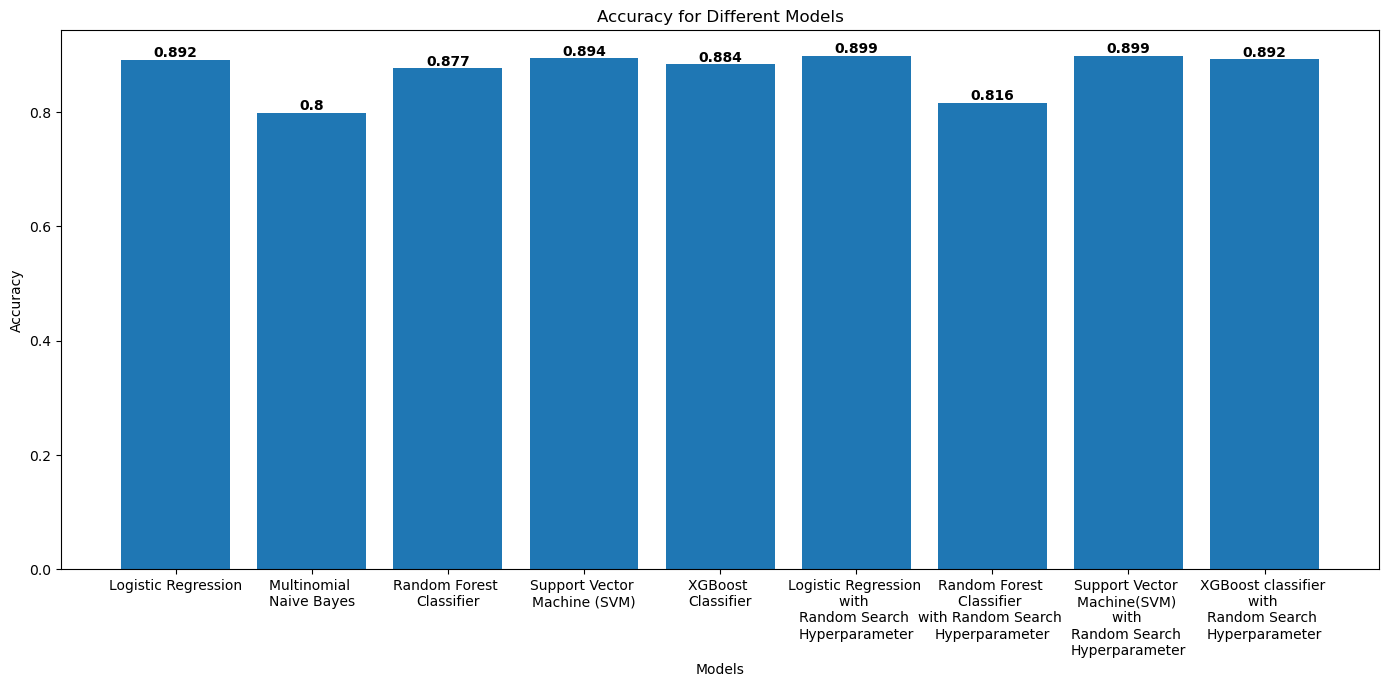

In [87]:
def plot_histogram(metric_values, model_names, metric_name):
    fig, ax = plt.subplots(figsize=(17, 7))
    bars = plt.bar(model_names, metric_values)
    plt.xlabel('Models')
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} for Different Models')

    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom', color='black', fontweight='bold')
    plt.show()

accuracy_values = [accuracy_score_LR,accuracy_score_MNB,accuracy_score_rf_clf,accuracy_score_SVC,accuracy_score_XGB,accuracy_score_LR_RSH,accuracy_score_rf_RSH,accuracy_score_SVC_RSH,accuracy_score_XGB_RSH]
model_names = ['Logistic Regression','Multinomial \nNaive Bayes', 'Random Forest \nClassifier', 
               'Support Vector \nMachine (SVM)','XGBoost \nClassifier',
               'Logistic Regression \nwith \nRandom Search \nHyperparameter',
               'Random Forest \nClassifier \nwith Random Search \nHyperparameter',
               'Support Vector \nMachine(SVM) \nwith \nRandom Search \nHyperparameter',
               'XGBoost classifier \nwith \nRandom Search \nHyperparameter' ]
plot_histogram(accuracy_values, model_names, 'Accuracy')

#### Identify the strengths and weaknesses of each model-

#### 1. Logistic Regression-
##### Accuracy: 89%
##### With Hyperparameter Tuning Accuracy: 90%

##### Strengths:

- `Interpretability:` Logistic Regression provides clear insights into the contribution of each feature to the final decision, making it easy to understand and interpret.

- `Performance on Linearly Separable Data:` It performs well on linearly separable data.
- `Efficiency:` It is computationally efficient and works well on large datasets.
- `Improved Performance:` Hyperparameter tuning (e.g., adjusting the regularization parameter) can lead to better performance by preventing overfitting or underfitting.

##### Weaknesses:

- ` Linear Boundaries:` It assumes a linear relationship between the features and the log-odds of the outcome, which may not be suitable for complex datasets with non-linear relationships.
- ` Outliers:` Sensitive to outliers, which can skew the results.
- `Requires More Expertise:` The need for tuning introduces an additional layer of complexity, requiring more expertise to select appropriate hyperparameters and validation techniques.


#### 2. Multinomial Naive Bayes- 
##### Accuracy: 80%

##### Strengths:

- ` Simplicity:` Naive Bayes is easy to implement and understand.
- ` Speed:` It is computationally efficient and fast, making it suitable for large datasets.
- ` Performance on Text Data:` Performs well on text classification problems due to its strong assumptions of feature independence.

##### Weaknesses:

- `Feature Independence Assumption:` The strong independence assumption (features are independent given the class) is rarely true in real-world data, which can lead to suboptimal performance.
- `Moderate Accuracy:` Lower accuracy compared to more sophisticated models, as seen in this example.


#### 3. Random Forest Classifier- 
##### Accuracy: 88%
##### With Hyperparameter Tuning Accuracy: 81%

##### Strengths:

- `Robustness:` Robust to overfitting due to the averaging of multiple decision trees.
- `Performance:` Generally provides good accuracy and handles non-linear relationships well.
- `Feature Importance:` Can provide insights into feature importance.
- `Control Over Model Complexity:` Hyperparameter tuning allows for better control over model complexity, helping to balance bias and variance.

##### Weaknesses:

- `Complexity:` The model is more complex and less interpretable compared to simpler models like Logistic Regression.
- `Computational Cost:` Training and prediction can be computationally intensive, especially with large numbers of trees.
- `Counterintuitive Results:` As seen with the 81% accuracy post-tuning, improper tuning or overfitting to the validation data can actually degrade performance. This highlights the risk of tuning leading to suboptimal results if not done correctly.

#### 4. Support Vector Machine (SVM)-
##### Accuracy: 89%
##### With Hyperparameter Tuning Accuracy: 90%

##### Strengths:
- Effective in high-dimensional spaces, making it suitable for complex datasets.
- Can be customized with different kernel functions (linear, polynomial, RBF) to find optimal decision boundaries.
- Robust to overfitting, especially with the use of a proper kernel and regularization.

##### Weaknesses:
- Computationally intensive, especially for large datasets.
- Performance can degrade with noisy data or when classes are not well separated.
- Difficult to interpret and visualize the model, particularly with non-linear kernels.


#### 5. XGBoost Classifier-
##### Accuracy: 88%
##### With Hyperparameter Tuning Accuracy: 89%

##### Strengths:
- High predictive power and accuracy due to gradient boosting, which combines weak learners.
- Handles missing values well and can manage a variety of data types.
- Offers feature importance metrics, aiding interpretability and feature selection.

##### Weaknesses:
- Computationally expensive, especially during training with a large number of trees.
- Sensitive to overfitting if not properly regularized.
- Requires careful tuning of many hyperparameters to achieve optimal performance.





### <div style="color: gray;">Step 8. Conclusion-</div>
- Summarize the findings of the project.
- Provide insights into the challenges faced and lessons learned.

### <div style="color: gray;">Step 8.  Solution -</div>


#### Summary:


##### Logistic Regression (89% & With Hyperparameter Tuning 90%): 
- High accuracy, simple, and interpretable, but may struggle with non-linear relationships.

##### Multinomial Naive Bayes (80%): 
- Simple and fast, good for text data, but lower accuracy due to strong independence assumptions.

##### Random Forest Classifier (88% & With Hyperparameter Tuning 81%): 
- Good accuracy and robust, but complex and computationally intensive.
- Improper tuning or overfitting to the validation data can actually degrade performance. This highlights the risk of tuning leading to suboptimal results if not done correctly.

##### Support Vector Machine (SVM) (89% & With Hyperparameter Tuning 90%):
- SVM models are strong with structured data and high dimensions, but may struggle with interpretability and noise.

##### XGBoost Classifier(88% & With Hyperparameter Tuning 89%):
- XGBoost offers strong predictive power and robustness but requires careful tuning and can be computationally intensive.


#### Conclusion:

Based on the accuracies provided, the models with the highest performance are:

- `Logistic Regression with Random Search Hyperparameter Tuning -` 90%
- `Support Vector Machine (SVM) with Random Search Hyperparameter Tuning -` 90%

Both models have achieved the highest accuracy of 90%. To select the best model between these two, consider additional factors beyond accuracy, such as:

- `Interpretability:` Logistic Regression is generally more interpretable than SVM, as it provides clear coefficients that indicate the impact of each feature.
- `Computational Efficiency:` Logistic Regression is typically less computationally intensive than SVM, especially with large datasets.
- `Scalability:` Both models can handle large datasets, but SVMs may become slow with very large datasets or high-dimensional data.
- `Feature Importance:` Logistic Regression can naturally provide feature importance through the coefficients, which may aid in understanding the model.
- `Handling of Non-linear Relationships:` SVM with appropriate kernel choice can capture non-linear relationships, making it more flexible in handling complex data patterns.

#### Recommendation
- If interpretability and computational efficiency are priorities, Logistic Regression with Random Search Hyperparameter Tuning is preferable due to its simplicity and ease of understanding.

- If capturing complex, non-linear relationships is more critical, then SVM with Random Search Hyperparameter Tuning would be the better choice, provided the computational resources are sufficient.

Given the accuracy tie, your final choice should depend on your specific needs for interpretability, computational efficiency, and the nature of the data. If no additional constraints are specified, Logistic Regression with Random Search Hyperparameter Tuning might be the slightly better option due to its interpretability and ease of use.